# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset Stunting Detection (https://www.kaggle.com/code/rojindarafarin/stunting-balita-detection)

   Dataset berisi informasi tentang balita dengan beberapa variabel penting terkait pertumbuhan dan status gizinya. Variabel umur (bulan) digunakan untuk melihat fase pertumbuhan anak sesuai standar kesehatan, sedangkan jenis kelamin membantu membedakan pola pertumbuhan antara laki-laki dan perempuan. Tinggi badan dalam sentimeter menjadi indikator utama untuk menilai apakah pertumbuhan anak sesuai dengan usianya. Terakhir, status gizi dikategorikan menjadi severely stunting, stunting, normal, dan tinggi, yang berfungsi untuk mengklasifikasikan kondisi gizi balita dan memudahkan identifikasi risiko stunting atau pertumbuhan di atas rata-rata.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ==============================
# 1. Import Library
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier, plot_importance

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# ==============================
# 2. Load Dataset
# ==============================
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_balita.csv")

print("✅ Data berhasil dimuat")
print(data.head())

✅ Data berhasil dimuat
   Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
0             0     laki-laki          44.591973           stunted
1             0     laki-laki          56.705203            tinggi
2             0     laki-laki          46.863358            normal
3             0     laki-laki          47.508026            normal
4             0     laki-laki          42.743494  severely stunted


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

📌 Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB
None

📌 Statistik Deskriptif
        Umur (bulan)  Tinggi Badan (cm)
count  120999.000000      120999.000000
mean       30.173803          88.655434
std        17.575119          17.300997
min         0.000000          40.010437
25%        15.000000          77.000000
50%        30.000000          89.800000
75%        45.000000         101.200000
max        60.000000         128.000000

📌 Distribusi Status Gizi
Status Gizi
normal              67755
severely stunted    19869
tinggi              19560
stunted  

/tmp/ipython-input-2727717904.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Status Gizi", data=data, palette="Set2")


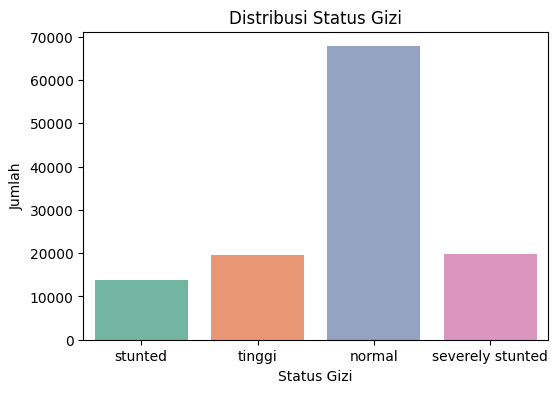

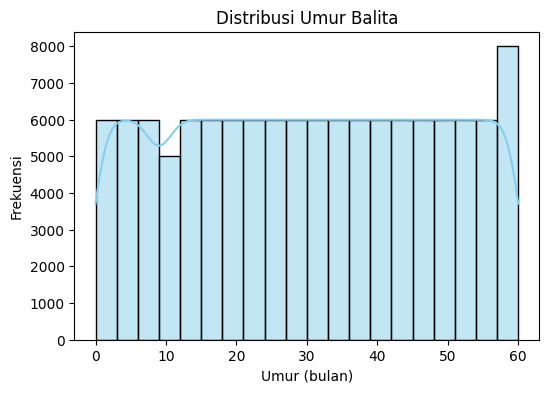

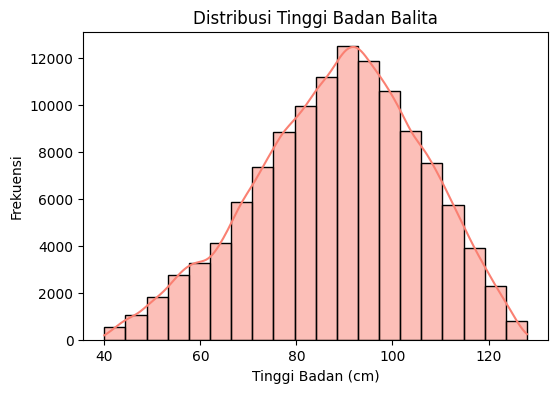

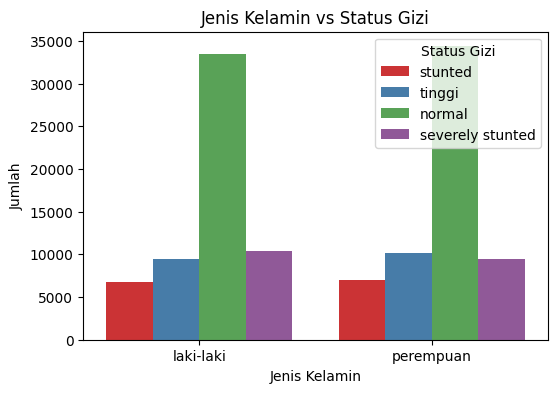

/tmp/ipython-input-2727717904.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status Gizi", y="Tinggi Badan (cm)", data=data, palette="pastel")


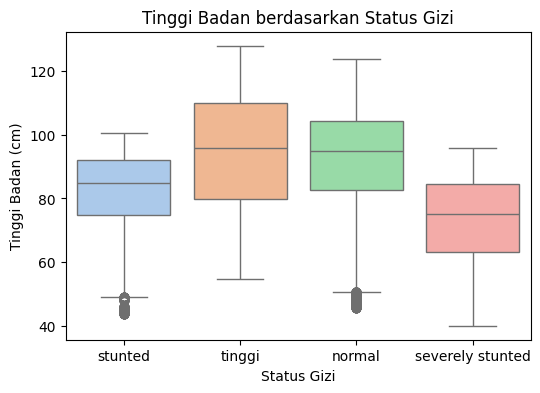

In [4]:
# ================================
#  Exploratory Data Analysis (EDA)
# ================================

# Informasi umum dataset
print("="*40)
print("📌 Informasi Dataset")
print("="*40)
print(data.info())

# Statistik deskriptif
print("\n" + "="*40)
print("📌 Statistik Deskriptif")
print("="*40)
print(data.describe())

# Distribusi Status Gizi
print("\n" + "="*40)
print("📌 Distribusi Status Gizi")
print("="*40)
print(data["Status Gizi"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x="Status Gizi", data=data, palette="Set2")
plt.title("Distribusi Status Gizi")
plt.xlabel("Status Gizi")
plt.ylabel("Jumlah")
plt.show()

# Distribusi Umur
plt.figure(figsize=(6,4))
sns.histplot(data["Umur (bulan)"], bins=20, kde=True, color="skyblue")
plt.title("Distribusi Umur Balita")
plt.xlabel("Umur (bulan)")
plt.ylabel("Frekuensi")
plt.show()

# Distribusi Tinggi Badan
plt.figure(figsize=(6,4))
sns.histplot(data["Tinggi Badan (cm)"], bins=20, kde=True, color="salmon")
plt.title("Distribusi Tinggi Badan Balita")
plt.xlabel("Tinggi Badan (cm)")
plt.ylabel("Frekuensi")
plt.show()

# Hubungan Jenis Kelamin dengan Status Gizi
plt.figure(figsize=(6,4))
sns.countplot(x="Jenis Kelamin", hue="Status Gizi", data=data, palette="Set1")
plt.title("Jenis Kelamin vs Status Gizi")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.legend(title="Status Gizi")
plt.show()

# Boxplot Tinggi Badan berdasarkan Status Gizi
plt.figure(figsize=(6,4))
sns.boxplot(x="Status Gizi", y="Tinggi Badan (cm)", data=data, palette="pastel")
plt.title("Tinggi Badan berdasarkan Status Gizi")
plt.xlabel("Status Gizi")
plt.ylabel("Tinggi Badan (cm)")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os

def preprocess(data, output_file):
    # Load dataset
    # Missing Values
    data = data.dropna()

    # Remove duplicates
    data = data.drop_duplicates()

    # Encoding
    le_gender = LabelEncoder()
    data["Jenis Kelamin"] = le_gender.fit_transform(data["Jenis Kelamin"])

    le_status = LabelEncoder()
    data["Status Gizi"] = le_status.fit_transform(data["Status Gizi"])

    # Scaling
    scaler = StandardScaler()
    data[["Umur (bulan)", "Tinggi Badan (cm)"]] = scaler.fit_transform(
        data[["Umur (bulan)", "Tinggi Badan (cm)"]]
    )

    # Create directory if it doesn't exist
    output_dir = os.path.dirname(output_file)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save hasil
    data.to_csv(output_file, index=False)
    print(f"✅ Data selesai diproses dan disimpan ke {output_file}")
    return data

if __name__ == "__main__":
    output_file = "namadataset_preprocessing/data_balita_ready.csv"
    processed_data = preprocess(data.copy(), output_file)
    print(processed_data.head())

✅ Data selesai diproses dan disimpan ke namadataset_preprocessing/data_balita_ready.csv
   Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
0     -1.469424              0          -2.096915            2
1     -1.469424              0          -1.484093            3
2     -1.469424              0          -1.982003            0
3     -1.469424              0          -1.949388            0
4     -1.469424              0          -2.190431            1
